# Class Workbook {.tabset .tabset-fade .tabset-pills}

## In class activity

In [1]:
import numpy as np
import pandas as pd
#import math
from matplotlib.pyplot import subplots
#import statsmodels.api as sm
from plotnine import *
#import plotly.express as px
#import statsmodels.formula.api as sm
#import ISLP as islp

### Bank Credit Data

Please take a look at the following credit scoring data set. This data was used to predict defaults on consumer loans. The data contains  1000 rows and 21 variables:

In [2]:
credit_data=pd.read_csv("credit_data.csv")

Here are the variables.

- BAD: factor, GOOD/BAD for whether a customer has defaulted on a loan. This is the outcome or target in this dataset
- Account_status: factor, status of existing checking account
- Duration: numeric, loan duration in month
- Credit_history: factor, previous credit history
- Purpose: factor, loan purpose
- Amount: numeric, credit amount
- Savings: factor, savings account/bonds
- Employment: factor, present employment since
- Installment_rate: numeric, installment rate in percentage of disposable income
- Guarantors: factor, other debtors / guarantors
- Resident_since: factor, present residence since
- Property: factor, property
- Age: numeric, age in years
- Other_plans: factor, other installment plans (bank ,none, stores )
- Housing: factor, housing
- Num_credits: numeric, Number of existing credits at this bank
- Job: factor, job( management / self-employed / highly qualified employee / officer; skilled employee / official ; unemployed / unskilled - non-resident ; unskilled - resident )
- People_maintenance: numeric, number of people being liable to provide maintenance for
- Phone: factor, telephone (none ; yes, registered under the customers name )
- Foreign: factor, foreign worker ( no ; yes )
- Female: factor, female/male for gender

Create a predictive model that predicts the outcome `BAD`.

In [3]:
from sklearn.model_selection import train_test_split

# split the data
X_train, X_test, y_train, y_test = train_test_split(credit_data.loc[:,credit_data.columns != "BAD"], credit_data.loc[:,"BAD"], test_size=0.33, random_state=42)

# One-hot encoding on categorical features
X_train = pd.get_dummies(X_train, drop_first=True) 
X_test = pd.get_dummies(X_test, drop_first=True)

credit_data_train  = pd.concat([X_train, y_train], axis=1)
credit_data_valid  = pd.concat([X_test, y_test], axis=1)

Evaluate your model performance.  What criteria do you think will be appropriate.

In [4]:
credit_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 670 entries, 703 to 102
Data columns (total 48 columns):
 #   Column                                                                       Non-Null Count  Dtype 
---  ------                                                                       --------------  ----- 
 0   Unnamed: 0                                                                   670 non-null    int64 
 1   Duration                                                                     670 non-null    int64 
 2   Amount                                                                       670 non-null    int64 
 3   Installment_rate                                                             670 non-null    int64 
 4   Resident_since                                                               670 non-null    int64 
 5   Age                                                                          670 non-null    int64 
 6   Num_credits                                     

In [5]:
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR)
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from ISLP.bart import BART

In [6]:
# the maximum number of predictors we use while creating models
21 ** (1/2 )

4.58257569495584

In [7]:
RF_credit = RandomForestClassifier(random_state=123).fit(X_train, y_train)
y_hat_RF = RF_credit.predict(X_test)

In [8]:
# Evaluate
accuracy = accuracy_score(y_test, y_hat_RF)
conf_matrix = confusion_matrix(y_test, y_hat_RF)
class_report = classification_report(y_test, y_hat_RF)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7545454545454545
Confusion Matrix:
[[ 34  67]
 [ 14 215]]
Classification Report:
              precision    recall  f1-score   support

         BAD       0.71      0.34      0.46       101
        GOOD       0.76      0.94      0.84       229

    accuracy                           0.75       330
   macro avg       0.74      0.64      0.65       330
weighted avg       0.75      0.75      0.72       330



Comment of the result:

~~~
Please write your answer in full sentences.


~~~

### Ames Housing data

Please take a look at the Ames Housing data.

In [9]:
ames_raw=pd.read_csv("ames_raw.csv")

Use data of `ames_raw` up to 2008 predict the housing price for the later years.

In [10]:
# Do feature engineering if needed.
ames_raw_2009, ames_raw_2008= ames_raw.query('`Yr Sold`>=2008').copy(), ames_raw.query('`Yr Sold` <2008').copy()

Use the same loss function calculator.

In [11]:
def calc_loss(prediction,actual):
  difpred = actual-prediction
  RMSE =pow(difpred.pow(2).mean(),1/2)
  operation_loss=abs(sum(difpred[difpred<0]))+sum(0.1*actual[difpred>0])
  return RMSE,operation_loss

Apply CART and try to interpret the result that you get.  Be sure to fit the models on a training set and evaluate their performance on a test set.  Does it have a good prediction accuracy?

In [12]:
from sklearn.impute import SimpleImputer

# Split train and test data
X_train = ames_raw_2008.drop(['SalePrice', 'Yr Sold'], axis=1)
y_train = ames_raw_2008['SalePrice']
X_test = ames_raw_2009.drop(['SalePrice', 'Yr Sold'], axis=1)
y_test = ames_raw_2009['SalePrice']

# Imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train[numerical_columns] = imputer.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = imputer.transform(X_test[numerical_columns])

# imputer.fit_transform:imputation based on the provided data. It is suitable for use with training data
# imputer.transform():This method imputes using the training data. (without learning a test data).


# One-hot encoding on categorical features
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align training and testing sets
X_train, X_test = X_train.align(X_test, join='inner', axis=1)

# join='inner' specifies that only the columns that are common to both X_train and X_test should be kept.

In [13]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

cart = DecisionTreeRegressor(random_state=123)
cart.fit(X_train, y_train)

DecisionTreeRegressor(random_state=123)

In [14]:
# Predict on the test set
y_pred = cart.predict(X_test)

# Evaluate
rmse, operation_loss = calc_loss(y_pred, y_test)
print(f"RMSE: {rmse}")
print(f"Operational Loss: {operation_loss}")

RMSE: 34629.28475718084
Operational Loss: 36107847.5


Comment of the result:

~~~
Please write your answer in full sentences.


~~~

Apply boosting, bagging, random forests, and BART to the Ames Housing data set. Be sure to fit the models on a training set and evaluate their performance on a test set. How accurate are the results compared to simple linear regression methods? Which of these approaches yields the best performance?

In [15]:
# Bagging
bag_Ames = RF(max_features=X_train.shape[1],
               random_state=123).fit(X_train, y_train)


In [16]:
y_pred = bag_Ames.predict(X_test)
rmse, operation_loss = calc_loss(y_pred, y_test)
print(f"RMSE for Bagging: {rmse}")
print(f"Operational Loss for Bagging: {operation_loss}")

RMSE for Bagging: 26945.965093720104
Operational Loss for Bagging: 30384407.250000007


In [17]:
# Random Forests
ames_raw.shape[1] ** (1/2)

9.055385138137417

In [18]:
RF_Ames = RF(max_features=9,
               random_state=123).fit(X_train, y_train)

In [19]:
y_pred = RF_Ames.predict(X_test)
rmse, operation_loss = calc_loss(y_pred, y_test)
print(f"RMSE for Random Forests: {rmse}")
print(f"Operational Loss for Random Forests: {operation_loss}")

RMSE for Random Forests: 27953.901705549397
Operational Loss for Random Forests: 30195564.67000001


In [20]:
# Boosting
boost_Ames = GBR(n_estimators=5000,
                   learning_rate=0.001,
                   max_depth=3,
                   random_state=123).fit(X_train, y_train)

In [21]:
y_pred = boost_Ames.predict(X_test)
rmse, operation_loss = calc_loss(y_pred, y_test)
print(f"RMSE for Boosting: {rmse}")
print(f"Operational Loss for Boosting: {operation_loss}")

RMSE for Boosting: 24930.52497646014
Operational Loss for Boosting: 29496854.97567831


In [22]:
# BART
bart_Ames = BART(random_state=123, burnin=5, ndraw=15).fit(X_train, y_train)
# we can choose values for burnin and ndraw

In [23]:
# The following code has error message
# y_pred = bart_Ames.predict(X_test.astype(np.float32))
# rmse, operation_loss = calc_loss(y_pred, y_test)
# print(f"RMSE for BART: {rmse}")
# print(f"Operational Loss for BART: {operation_loss}")

In [24]:
GBR_Ames = GBR(random_state=123).fit(X_train, y_train)

In [25]:
y_pred = GBR_Ames.predict(X_test)
rmse, operation_loss = calc_loss(y_pred, y_test)
print(f"RMSE for Gradient Boosting: {rmse}")
print(f"Operational Loss for Gradient Boosting: {operation_loss}")

RMSE for Gradient Boosting: 24445.903059986893
Operational Loss for Gradient Boosting: 28298285.973349445


In [26]:
XGBR_Ames = XGBRegressor(random_state=123).fit(X_train, y_train)

In [27]:
y_pred = XGBR_Ames.predict(X_test)
rmse, operation_loss = calc_loss(y_pred, y_test)
print(f"RMSE for XGBoost: {rmse}")
print(f"Operational Loss for XGBoost: {operation_loss}")

RMSE for XGBoost: 28041.335237979547
Operational Loss for XGBoost: 30128213.457031243


Comment of the result:

~~~
Please write your answer in full sentences.


~~~

## Problem Set

### Boston


In Section 8.3.3, we applied random forests to the Boston data using max_features = 6 and using n_estimators = 100 and n_estimators = 500. Create a plot displaying the test error resulting from random forests on this data set for a more comprehensive range of values for max_features and n_estimators. You can model your plot after Figure 8.10. Describe the results obtained.

In [103]:
from ISLP import load_data
Boston = load_data("Boston")

###

In the lab, a classification tree was applied to the Carseats data set after converting Sales into a qualitative response variable. Now we will seek to predict Sales using regression trees and related approaches, treating the response as a quantitative variable.

In [106]:
Carseats = load_data("Carseats")
Carseats.head()
Carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.7 KB


(a) Split the data set into a training set and a test set.

In [110]:
from sklearn.model_selection import train_test_split

X = Carseats.drop(columns=['Sales']) 
y = Carseats['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


(b) Fit a regression tree to the training set. Plot the tree, and interpret the results. What test MSE do you obtain?

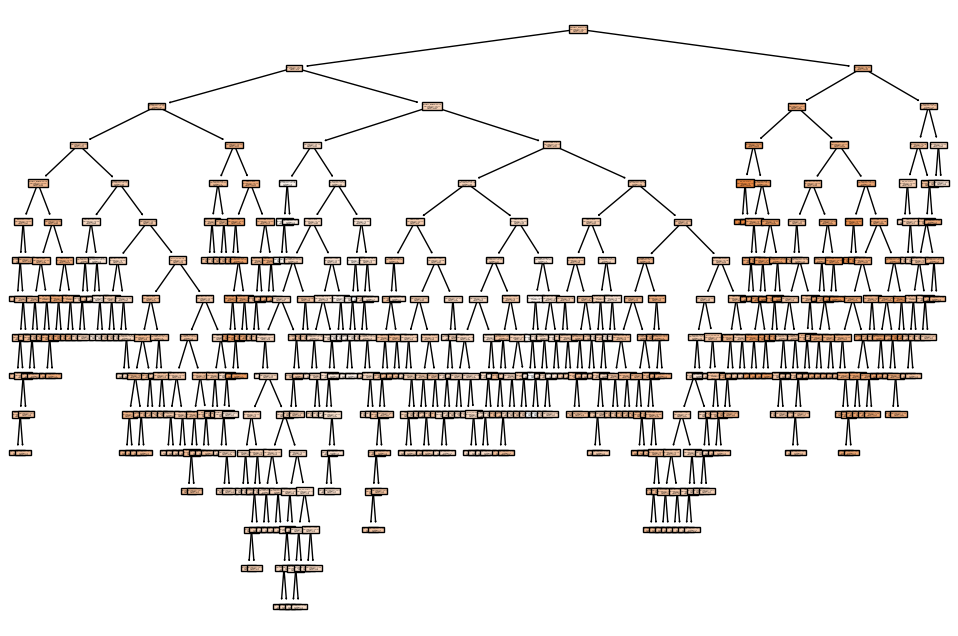

In [114]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Train a decision tree regressor
tree_reg = DecisionTreeRegressor(random_state=123)
tree_reg.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(12, 8))
plot_tree(tree_reg, filled=True, feature_names=X_train.columns.tolist())
plt.show()

In [115]:
# Predict on the test set
y_pred = tree_reg.predict(X_test)

# Calculate test MSE
test_mse = mean_squared_error(y_test, y_pred)
print("Test Mean Squared Error:", test_mse)


Test Mean Squared Error: 4.978875


(c) Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE?

In [119]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Define a range of depths to try
depths = np.arange(1, 21)

# Perform cross-validation for each depth
cv_scores = []
for depth in depths:
    tree_reg = DecisionTreeRegressor(max_depth=depth, random_state=123)
    scores = cross_val_score(tree_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(-scores.mean())

# Find the depth with the lowest cross-validated MSE
optimal_depth = depths[np.argmin(cv_scores)]
print("Optimal Depth:", optimal_depth)

Optimal Depth: 3


In [118]:
# Train a decision tree regressor with the optimal depth
optimal_tree_reg = DecisionTreeRegressor(max_depth=optimal_depth, random_state=123)
optimal_tree_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_optimal = optimal_tree_reg.predict(X_test)

# Calculate test MSE
test_mse_optimal = mean_squared_error(y_test, y_pred_optimal)
print("Test MSE with optimal depth:", test_mse_optimal)

Test MSE with optimal depth: 5.0769535697905495


(d) Use the bagging approach in order to analyze this data. What
test MSE do you obtain? Use the feature_importance_ values to
determine which variables are most important.

In [120]:
# Bagging
bag_model = RF(max_features=X_train.shape[1],
               random_state=123).fit(X_train, y_train)

test_mse_bag = mean_squared_error(y_test, bag_model.predict(X_test))
print("Test MSE (Bagging):", test_mse_bag)

Test MSE (Bagging): 2.800412599749999


In [122]:
# Get feature importances from the trained boosting model
feature_importances = bag_model.feature_importances_

# Create a DataFrame to store feature importances along with feature names
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important predictors
print(importance_df.head(11))

             Feature  Importance
7     ShelveLoc_Good    0.275969
4              Price    0.272770
5                Age    0.087138
0          CompPrice    0.083803
2        Advertising    0.083363
8   ShelveLoc_Medium    0.058602
1             Income    0.050558
6          Education    0.038604
3         Population    0.035581
10            US_Yes    0.008128
9          Urban_Yes    0.005484


(e) Use random forests to analyze this data. What test MSE do you obtain? Use the feature_importance_ values to determine
which variables are most important. Describe the effect of m, the number of variables considered at each split, on the error rate
obtained.

In [129]:

# Train a Random Forest Regressor
m  = X_train.shape[1] ** (1/2)
m_rounded = round(m)

rf_model = RF(max_features = m_rounded, random_state=123)  
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate test MSE
test_mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Test MSE (Random Forest):", test_mse_rf)
print(f"we used {m_rounded} features at each split")

Test MSE (Random Forest): 3.330846302166665
we used 3 features at each split


In [130]:
# Get feature importances from the trained boosting model
feature_importances_rf = rf_model.feature_importances_

# Create a DataFrame to store feature importances along with feature names
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_rf})

# Sort the DataFrame by importance values in descending order
importance_df_rf = importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important predictors
print(importance_df_rf.head(11))

             Feature  Importance
4              Price    0.222821
7     ShelveLoc_Good    0.217281
5                Age    0.099038
2        Advertising    0.096947
0          CompPrice    0.088856
1             Income    0.081299
3         Population    0.067966
6          Education    0.054561
8   ShelveLoc_Medium    0.041493
10            US_Yes    0.018503
9          Urban_Yes    0.011236


(f) Now analyze the data using BART, and report your results.

### OJ

This problem involves the OJ data set which is part of the ISLR2 package.

In [30]:
OJ = load_data("OJ")
OJ.head()
OJ.shape

(1070, 18)

(a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

Your code:

In [31]:
np.random.RandomState(123)
selIndex = np.random.randint(0, OJ.shape[0] - 1, 800)
train = OJ.iloc[selIndex]
test = OJ.drop(selIndex)

trainOJ_X = pd.get_dummies(train.drop("Purchase", axis=1), drop_first=True)
trainOJ_y = train.loc[:,"Purchase"]
testOJ_X = pd.get_dummies(test.drop("Purchase", axis=1), drop_first=True)
testOJ_y = test.loc[:,"Purchase"]

Your answer:

~~~
Please write your answer in full sentences.


~~~

(b) Fit a tree to the training data, with Purchase as the response
and the other variables as predictors. What is the training error
rate?

Your code:

In [32]:
from sklearn.tree import DecisionTreeClassifier

OJtree = DecisionTreeClassifier()
OJtree.fit(trainOJ_X, trainOJ_y)
Err_train = sum(OJtree.predict(trainOJ_X) != trainOJ_y) /trainOJ_y.shape[0]
print(f'Training Error Rate: {Err_train * 100}%')

Training Error Rate: 0.75%


Your answer:

~~~
Please write your answer in full sentences.


~~~

(c) Create a plot of the tree, and interpret the results. How many terminal nodes does the tree have?
Your code:

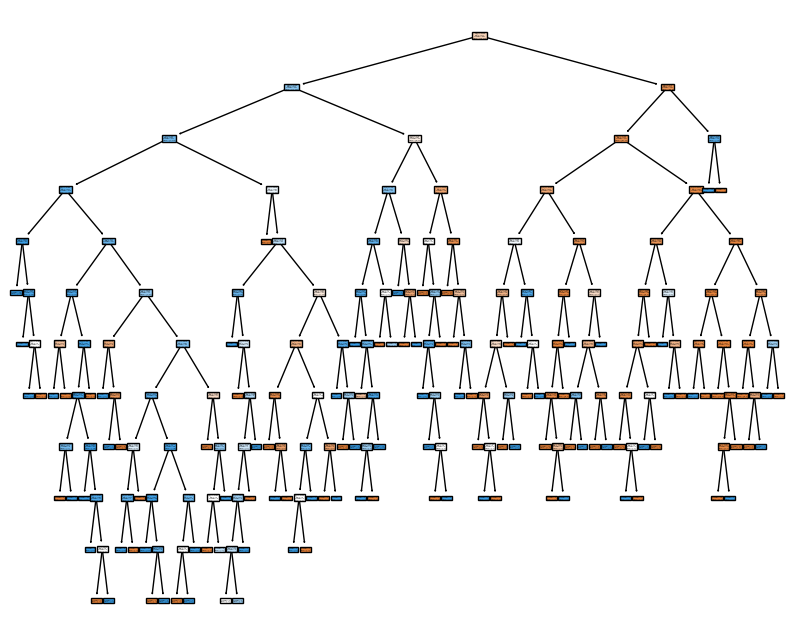

In [33]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(10, 8))
tree.plot_tree(OJtree, filled=True)
plt.show()


In [34]:
num_nodes = OJtree.tree_.node_count
print(f"Number of nodes in the tree: {num_nodes}")

Number of nodes in the tree: 217


Your answer:

~~~
Please write your answer in full sentences.


~~~

(d) Use the export_tree() function to produce a text summary of
the fitted tree. Pick one of the terminal nodes, and interpret the
information displayed.

In [35]:
from sklearn.tree import export_text
tree_text = export_text(OJtree, feature_names=list(trainOJ_X.columns))
print(tree_text)

|--- LoyalCH <= 0.56
|   |--- LoyalCH <= 0.47
|   |   |--- StoreID <= 3.50
|   |   |   |--- LoyalCH <= 0.05
|   |   |   |   |--- WeekofPurchase <= 268.00
|   |   |   |   |   |--- class: MM
|   |   |   |   |--- WeekofPurchase >  268.00
|   |   |   |   |   |--- PriceDiff <= 0.29
|   |   |   |   |   |   |--- class: MM
|   |   |   |   |   |--- PriceDiff >  0.29
|   |   |   |   |   |   |--- LoyalCH <= 0.00
|   |   |   |   |   |   |   |--- class: MM
|   |   |   |   |   |   |--- LoyalCH >  0.00
|   |   |   |   |   |   |   |--- class: CH
|   |   |   |--- LoyalCH >  0.05
|   |   |   |   |--- PriceDiff <= 0.17
|   |   |   |   |   |--- LoyalCH <= 0.06
|   |   |   |   |   |   |--- PriceCH <= 1.88
|   |   |   |   |   |   |   |--- class: MM
|   |   |   |   |   |   |--- PriceCH >  1.88
|   |   |   |   |   |   |   |--- class: CH
|   |   |   |   |   |--- LoyalCH >  0.06
|   |   |   |   |   |   |--- SpecialCH <= 0.50
|   |   |   |   |   |   |   |--- LoyalCH <= 0.15
|   |   |   |   |   |   |   |   |--- P

(e) Predict the response on the test data, and produce a confusion
matrix comparing the test labels to the predicted test labels.
What is the test error rate?

Your code:

In [36]:
from sklearn.metrics import confusion_matrix

y_pred = OJtree.predict(testOJ_X)

CM = confusion_matrix(testOJ_y, y_pred)
print(CM)

test_error_rate = (CM[0, 1] + CM[1, 0]) / CM.sum()
print(f"Test Error Rate: {test_error_rate * 100}%")

[[237  77]
 [ 59 142]]
Test Error Rate: 26.407766990291265%


Your answer:

~~~
Please write your answer in full sentences.


~~~

(f) Use cross-validation on the training set in order to determine
the optimal tree size.
Your code:

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth': range(1, 20)}
treeCV = DecisionTreeClassifier(random_state=123) 

grid_search = GridSearchCV(treeCV, param_grid, cv=5)

grid_search.fit(trainOJ_X, trainOJ_y)

opt_max_depth = grid_search.best_params_['max_depth']

print(f"The optimal tree size (max_depth) is: {opt_max_depth}")

The optimal tree size (max_depth) is: 11


Your answer:

~~~
Please write your answer in full sentences.


~~~

(g) Produce a plot with tree size on the x-axis and cross-validated
classification error rate on the y-axis.
Your code:

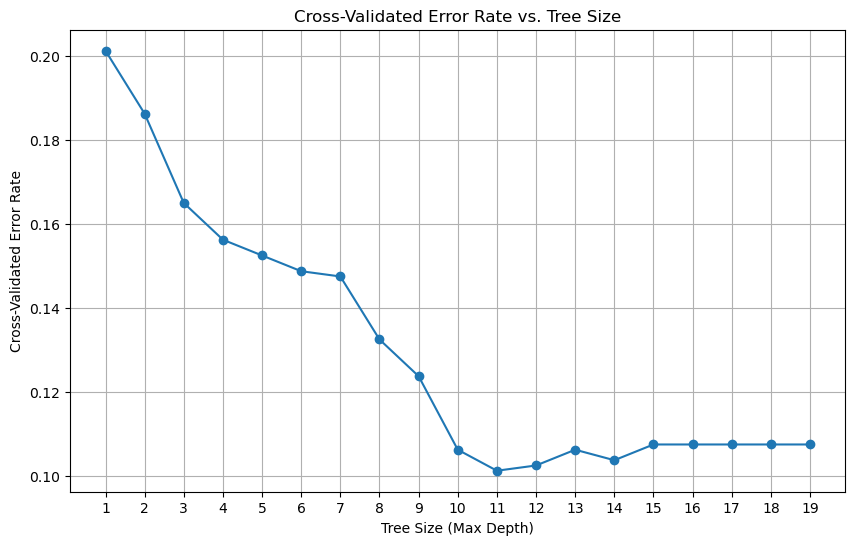

In [38]:
# Extracting mean cross-validated scores and corresponding max_depth values
mean_scores = grid_search.cv_results_['mean_test_score']
error_rates = 1 - mean_scores
max_depth_values = range(1, 20)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, error_rates, marker='o', linestyle='-')
plt.title('Cross-Validated Error Rate vs. Tree Size')
plt.xlabel('Tree Size (Max Depth)')
plt.ylabel('Cross-Validated Error Rate')
plt.xticks(max_depth_values)
plt.grid(True)
plt.show()

Your answer:

~~~
Please write your answer in full sentences.


~~~

(h) Which tree size corresponds to the lowest cross-validated classification error rate?

Your code:

In [39]:
min_error_index = np.argmin(error_rates)
optimal_max_depth = max_depth_values[min_error_index]

print(f"The tree size (max_depth) corresponding to the lowest cross-validated classification error rate is: {optimal_max_depth}")


The tree size (max_depth) corresponding to the lowest cross-validated classification error rate is: 11


Your answer:

~~~
Please write your answer in full sentences.


~~~

(i) Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation. If cross-validation does not lead
to selection of a pruned tree, then create a pruned tree with five terminal nodes.

Your code:

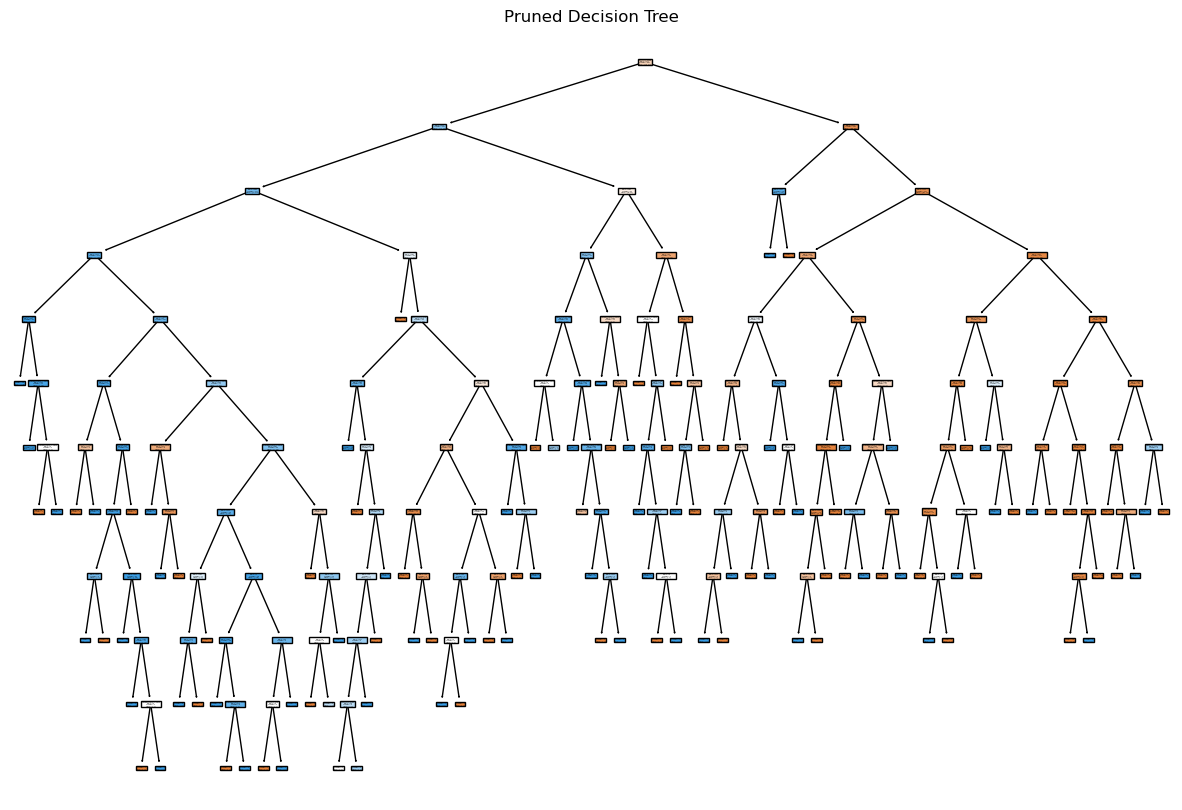

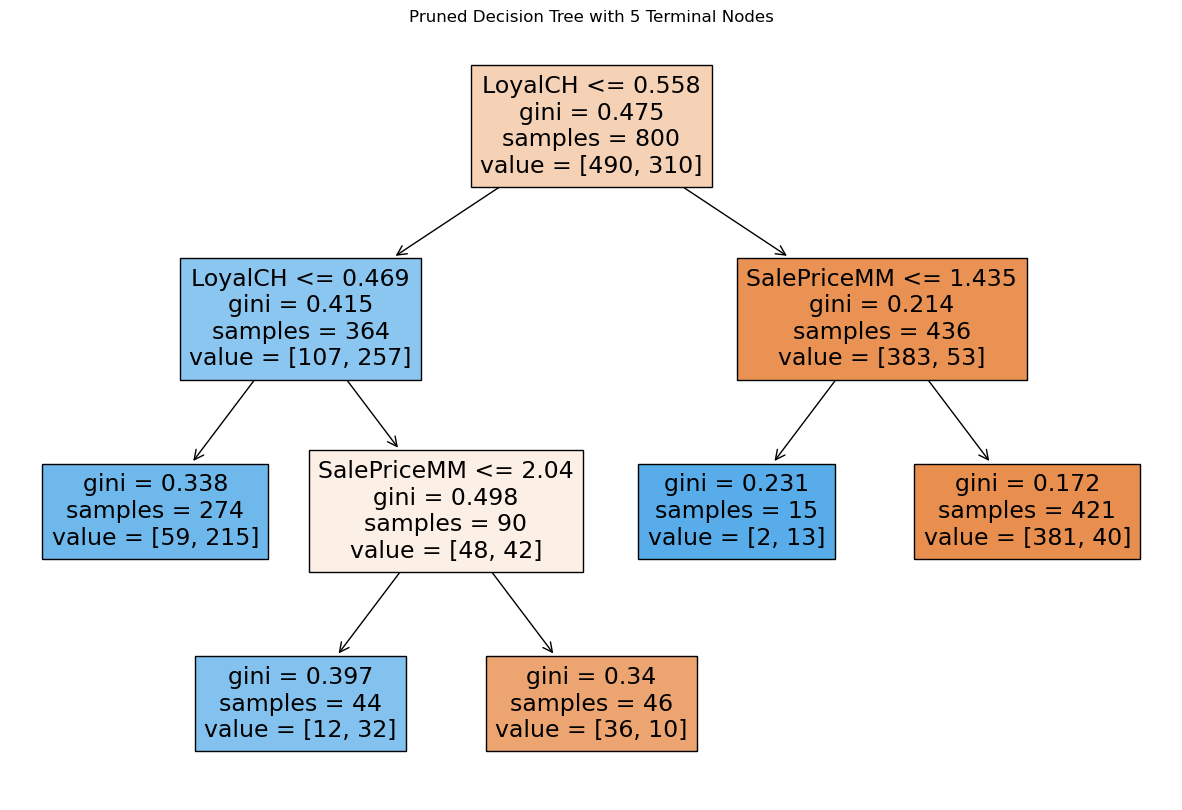

In [40]:
# Train a decision tree with the optimal max_depth obtained from cross-validation
optimal_tree = DecisionTreeClassifier(max_depth=opt_max_depth, random_state=123)
optimal_tree.fit(trainOJ_X, trainOJ_y)

# Plot the pruned decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(optimal_tree, filled=True, feature_names=trainOJ_X.columns.tolist())
plt.title('Pruned Decision Tree')
plt.show()

# Check if the tree has more than 5 terminal nodes
if optimal_tree.get_n_leaves() > 5:
    # If it has more than 5 terminal nodes, manually prune it to have 5 terminal nodes
    pruned_tree = DecisionTreeClassifier(max_leaf_nodes=5, random_state=123)
    pruned_tree.fit(trainOJ_X, trainOJ_y)
    
    # Plot the pruned decision tree with 5 terminal nodes
    plt.figure(figsize=(15, 10))
    tree.plot_tree(pruned_tree, filled=True, feature_names=trainOJ_X.columns.tolist())
    plt.title('Pruned Decision Tree with 5 Terminal Nodes')
    plt.show()
else:
    print("The optimal tree size already has 5 or fewer terminal nodes.")

Your answer:

~~~
Please write your answer in full sentences.


~~~

(j) Compare the training error rates between the pruned and unpruned trees. Which is higher?

Your code:

In [41]:
train_error_unpruned = 1 - optimal_tree.score(trainOJ_X, trainOJ_y)
train_error_pruned = 1 - pruned_tree.score(trainOJ_X, trainOJ_y)

print("Training Error Rate:")
print(f"- Unpruned Tree: {train_error_unpruned}")
print(f"- Pruned Tree: {train_error_pruned}")


Training Error Rate:
- Unpruned Tree: 0.007499999999999951
- Pruned Tree: 0.15375000000000005


Your answer:

~~~
Please write your answer in full sentences.

I found that the training error rate of pruned tree is higher than that of unpruned tree.
~~~


(k) Compare the test error rates between the pruned and unpruned trees. Which is higher?

Your code:

In [42]:
test_error_unpruned = 1 - optimal_tree.score(testOJ_X, testOJ_y)
test_error_pruned = 1 - pruned_tree.score(testOJ_X, testOJ_y)

print("Test Error Rate:")
print(f"- Unpruned Tree: {test_error_unpruned}")
print(f"- Pruned Tree: {test_error_pruned}")


Test Error Rate:
- Unpruned Tree: 0.2543689320388349
- Pruned Tree: 0.2077669902912621


Your answer:

~~~
Please write your answer in full sentences.

I found that this time the test error rate of unpruned tree is higher than that of pruned tree.
~~~

### Hitters

We now use boosting to predict Salary in the Hitters data set.

In [43]:
Hitters = load_data("Hitters")
Hitters.head()
# Hitters.info()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


(a) Remove the observations for whom the salary information is unknown, and then log-transform the salaries.

Your code:

In [44]:

# Drop rows with missing salary information (in total 263)
Hitters = Hitters.dropna(subset=['Salary'])

# Log-transform the salaries
Hitters['LogSalary'] = np.log(Hitters['Salary'])

Your answer:

~~~
Please write your answer in full sentences.


~~~

(b) Create a training set consisting of the first 200 observations, and a test set consisting of the remaining observations.

Your code:

In [45]:
train_set = Hitters[:200]  # Select the first 200 observations
test_set = Hitters[200:]   # Select the remaining observations

Your answer:

~~~
Please write your answer in full sentences.


~~~

(c) Perform boosting on the training set with 1,000 trees for a range of values of the shrinkage parameter $lambda$. Produce a plot with different shrinkage values on the x-axis and the corresponding
training set MSE on the y-axis.

Your code:

In [46]:
from sklearn.metrics import mean_squared_error

# Extract features and target variable from the training set
X_train = pd.get_dummies(train_set.drop(columns=['Salary', 'LogSalary']), drop_first=True) 
# trainOJ_X = pd.get_dummies(train.drop("Purchase", axis=1), drop_first=True)
y_train = train_set['LogSalary']

X_test = pd.get_dummies(test_set.drop(columns=['Salary', 'LogSalary']), drop_first=True) 
y_test = test_set['LogSalary']

In [47]:
# Define a range of shrinkage values
shrinkage_values = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]

# Initialize lists to store MSE values for each shrinkage value
mse_values_train = []

# Train the Gradient Boosting Regressor for each shrinkage value and compute MSE
for shrinkage in shrinkage_values:
    # Initialize Gradient Boosting Regressor with specified parameters
    gbr = GBR(n_estimators=1000, learning_rate=shrinkage, random_state=123)
    # Fit the model
    gbr.fit(X_train, y_train)
    # Make predictions on the training set
    y_train_pred = gbr.predict(X_train)
    # Compute mean squared error
    mse = mean_squared_error(y_train, y_train_pred)
    # Append MSE to the list
    mse_values_train.append(mse)

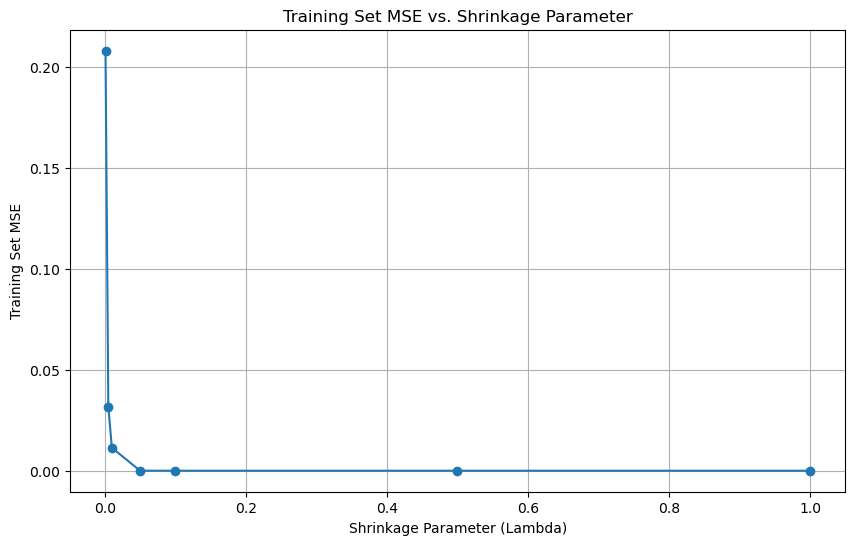

In [48]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(shrinkage_values, mse_values_train, marker='o', linestyle='-')
plt.title('Training Set MSE vs. Shrinkage Parameter')
plt.xlabel('Shrinkage Parameter (Lambda)')
plt.ylabel('Training Set MSE')
plt.grid(True)
plt.show()

Your answer:

~~~
Please write your answer in full sentences.


~~~

(d) Produce a plot with different shrinkage values on the x-axis and the corresponding test set MSE on the y-axis.

Your code:

In [49]:
# Define a range of shrinkage values
shrinkage_values = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]

# Initialize lists to store MSE values for each shrinkage value
mse_values_test = []

# Train the Gradient Boosting Regressor for each shrinkage value and compute MSE
for shrinkage in shrinkage_values:
    # Initialize Gradient Boosting Regressor with specified parameters
    gbr = GBR(n_estimators=1000, learning_rate=shrinkage, random_state=123)
    # Fit the model
    gbr.fit(X_train, y_train)
    # Make predictions on the training set
    y_test_pred = gbr.predict(X_test)
    # Compute mean squared error
    mse = mean_squared_error(y_test, y_test_pred)
    # Append MSE to the list
    mse_values_test.append(mse)

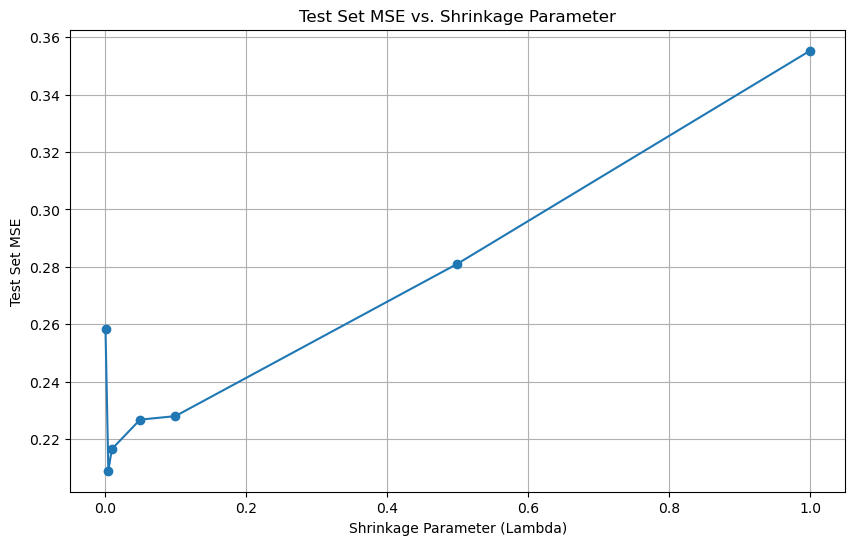

In [50]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(shrinkage_values, mse_values_test, marker='o', linestyle='-')
plt.title('Test Set MSE vs. Shrinkage Parameter')
plt.xlabel('Shrinkage Parameter (Lambda)')
plt.ylabel('Test Set MSE')
plt.grid(True)
plt.show()

Your answer:

~~~
Please write your answer in full sentences.


~~~

(e) Compare the test MSE of boosting to the test MSE that results from applying two of the regression approaches seen in Chapters 3 and 6.

Your code:

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

# Train a boosting model
boosting_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.001, random_state=123) 
# we chose learning rate from the previous plot
boosting_model.fit(X_train, y_train)

# Train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train a lasso regression model
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha parameter as needed
lasso_model.fit(X_train, y_train)

# Evaluate test MSE for each model
test_mse_boosting = mean_squared_error(y_test, boosting_model.predict(X_test))
test_mse_linear = mean_squared_error(y_test, linear_model.predict(X_test))
test_mse_lasso = mean_squared_error(y_test, lasso_model.predict(X_test))

# Print the test MSE for each model
print("Test MSE (Boosting):", test_mse_boosting)
print("Test MSE (Linear Regression):", test_mse_linear)
print("Test MSE (Lasso Regression):", test_mse_lasso)


Test MSE (Boosting): 0.258269353005984
Test MSE (Linear Regression): 0.4917959375454938
Test MSE (Lasso Regression): 0.504635876413114


/Users/yutatsukumo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.754e+01, tolerance: 1.664e-02


Your answer:

~~~
Please write your answer in full sentences.


~~~

(f) Which variables appear to be the most important predictors in the boosted model?

Your code:

In [52]:
# Get feature importances from the trained boosting model
feature_importances = boosting_model.feature_importances_

# Create a DataFrame to store feature importances along with feature names
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important predictors
print(importance_df.head(19))


        Feature  Importance
7        CAtBat    0.687443
0         AtBat    0.056373
10        CRuns    0.047188
5         Walks    0.047112
11         CRBI    0.044094
8         CHits    0.042261
1          Hits    0.020350
4           RBI    0.014294
9        CHmRun    0.013644
12       CWalks    0.010543
3          Runs    0.009049
6         Years    0.003221
13      PutOuts    0.003059
14      Assists    0.001369
2         HmRun    0.000000
15       Errors    0.000000
16     League_N    0.000000
17   Division_W    0.000000
18  NewLeague_N    0.000000


Your answer:

~~~
Please write your answer in full sentences.

I found that CAtBa is by far the most importsnt among variables regargid our model.
~~~

(g) Now apply bagging to the training set. What is the test set MSE for this approach?

Your code:

In [53]:
# Bagging
bag_model = RF(max_features=X_train.shape[1],
               random_state=123).fit(X_train, y_train)

test_mse_bag = mean_squared_error(y_test, bag_model.predict(X_test))
print("Test MSE (Bagging):", test_mse_bag)


Test MSE (Bagging): 0.23221071873930346


Your answer:

~~~
Please write your answer in full sentences.


~~~

### Caravan

This question uses the `Caravan` data set.

In [54]:
Caravan = load_data("Caravan")

Caravan.head()
Caravan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 86 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MOSTYPE   5822 non-null   int64 
 1   MAANTHUI  5822 non-null   int64 
 2   MGEMOMV   5822 non-null   int64 
 3   MGEMLEEF  5822 non-null   int64 
 4   MOSHOOFD  5822 non-null   int64 
 5   MGODRK    5822 non-null   int64 
 6   MGODPR    5822 non-null   int64 
 7   MGODOV    5822 non-null   int64 
 8   MGODGE    5822 non-null   int64 
 9   MRELGE    5822 non-null   int64 
 10  MRELSA    5822 non-null   int64 
 11  MRELOV    5822 non-null   int64 
 12  MFALLEEN  5822 non-null   int64 
 13  MFGEKIND  5822 non-null   int64 
 14  MFWEKIND  5822 non-null   int64 
 15  MOPLHOOG  5822 non-null   int64 
 16  MOPLMIDD  5822 non-null   int64 
 17  MOPLLAAG  5822 non-null   int64 
 18  MBERHOOG  5822 non-null   int64 
 19  MBERZELF  5822 non-null   int64 
 20  MBERBOER  5822 non-null   int64 
 21  MBERMIDD  5822

(a) Create a training set consisting of the first 1,000 observations, and a test set consisting of the remaining observations.

Your code:

In [93]:
train_set = Caravan[:1000]  # Select the first 1000 observations
test_set = Caravan[1000:]   # Select the remaining observations

(b) Fit a boosting model to the training set with `Purchase` as the response and the other variables as predictors. Use 1,000 trees, and a shrinkage value of 0.01. Which predictors appear to be the most important?

Your code:

In [94]:
# Extract features and target variable from the training set
X_train = pd.get_dummies(train_set.drop(columns=['Purchase']), drop_first=True) 
y_train = pd.get_dummies(train_set['Purchase'], drop_first=True)

X_test = pd.get_dummies(test_set.drop(columns=['Purchase']), drop_first=True) 
y_test = pd.get_dummies(test_set['Purchase'], drop_first=True)

In [95]:
# Train a boosting model
boosting_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, random_state=123) 

boosting_model.fit(X_train, y_train)

/Users/yutatsukumo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000,
                          random_state=123)

In [96]:
# Get feature importances from the trained boosting model
feature_importances = boosting_model.feature_importances_

# Create a DataFrame to store feature importances along with feature names
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important predictors
print(importance_df.head(15))

     Feature  Importance
46  PPERSAUT    0.075982
0    MOSTYPE    0.068923
8     MGODGE    0.057522
79    ABRAND    0.056343
42  MKOOPKLA    0.050171
15  MOPLHOOG    0.044735
21  MBERMIDD    0.042953
6     MGODPR    0.032955
58    PBRAND    0.031418
60  PPLEZIER    0.028539
69   AMOTSCO    0.028469
43   PWAPART    0.027520
81  APLEZIER    0.024426
13  MFGEKIND    0.022875
54    PLEVEN    0.022832


Your answer:

~~~
Please write your answer in full sentences.


~~~


(c) Use the boosting model to predict the response on the test data. Predict that a person will make a purchase if the estimated probability of purchase is greater than 20 %. Form a confusion matrix. What fraction of the people predicted to make a purchase do in fact make one? How does this compare with the results obtained from applying KNN or logistic regression to this data set?

Your code:

In [97]:
from sklearn.metrics import confusion_matrix

y_pred_prob = boosting_model.predict(X_test)

y_pred = (y_pred_prob > 0.2).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


[[4274  259]
 [ 246   43]]


In [101]:
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

fraction_TP = true_positives / (true_positives + false_positives)
print("Fraction of true positive (Boosting):", fraction_TP)

Fraction of true positive (Boosting): 0.1423841059602649


In [102]:
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Use the logistic regression model to predict on the test data
y_pred_logistic = logistic_model.predict(X_test)

# Form a confusion matrix
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

# Calculate the fraction of the people predicted to make a purchase who actually make one
true_positives_logistic = conf_matrix_logistic[1, 1]
false_positives_logistic = conf_matrix_logistic[0, 1]

fraction_TN_logistic = true_positives_logistic / (true_positives_logistic + false_positives_logistic)
print("Fraction of true positive (Logistic Regression):", fraction_TN_logistic)


Fraction of true positive (Logistic Regression): 0.22


/Users/yutatsukumo/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/yutatsukumo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Your answer:

~~~
Please write your answer in full sentences.


~~~

## Additional Material

In this section we will look at other popular tree based methods that are readily available.
For classification we will use the [iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) .

In [61]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
iris_X=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_y=pd.DataFrame(iris.target,columns=['Class'])

# split the data
X_train0, X_test, y_train0, y_test = train_test_split(iris_X, iris_y, test_size=0.33, random_state=42)
trainData = pd.concat([X_train0, y_train0], axis=1)
testData  = pd.concat([X_test, y_test], axis=1)

### CART graph

https://github.com/Sidon/Sidon.github.io/blob/master/_posts/dtree-w1.ipynb

In [62]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True')
    plt.xlabel('Predicted')

In [63]:
# Fit CART  Model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from io import StringIO
import pydotplus
import sklearn
import sklearn.metrics
from IPython.display import Image
out = StringIO()
clf = DecisionTreeClassifier()
clf = clf.fit(X_train0,y_train0)

# you will need to install graphviz
tree.export_graphviz(clf, out_file=out, feature_names=iris.feature_names,class_names=['0','1','2'],
                     filled=True, rounded=True, special_characters=True)

graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

predictions=clf.predict(X_test)
confusion_matrix = sklearn.metrics.confusion_matrix(y_test,predictions)
plot_confusion_matrix(confusion_matrix,['Setosa','Versicolour','Virginica'])

ModuleNotFoundError: No module named 'pydotplus'

### XGBoost

XGBoost became popular due to its success in Kaggle competitions.  It's essentially a gradient boosting but implemented to perform better out of the box.  Some of the nice features include:

- Default regularization
- Tree growing and pruning scheme allows for multiple cuts
- Computational efficiency by parallelization
- A couple of default choices to make it easier to use
- Handles missing data

However, if you want to go deeper, there are some challenges/concerns.

- Hyperparameter tuning is hard
- Missing data imputation scheme is concerning
- Cannot handle categorical variables

Here is it used for the iris data.

In [ ]:
import xgboost as xgb

param = {'max_depth': 2, 'eta': 1, 'objective': 'multi:softmax'}
param['nthread'] = 4
param['eval_metric'] = 'auc'
param['num_class'] = 3

num_round = 10

dtrain = xgb.DMatrix(X_train0, label=y_train0)
dtest = xgb.DMatrix(X_test, label=y_test)
evallist = [(dtrain, 'train'), (dtest, 'eval')]
bst = xgb.train(param, dtrain, num_round, evallist)
ypred = bst.predict(dtest)

What gets unwieldy is when you start to tune the parameters.
Here is the list of parameters used.  Not all of them need tuning, but I hope you understand.

- General Parameters that define the overall functionality of XGBoost.
  - booster [default=gbtree]: type of model
  - silent [default=0]: display log?
  - nthread [default to the maximum number of threads available if not set]: number of cores
- Learning Task Parameters define the optimization objective and the metric to be calculated at each step.
  - objective [default=reg:linear] the loss function to be minimized.
  - eval_metric [ default according to objective ] The metric for validation data.
  - seed [default=0] The random number seed.
- Booster Parameters
  - eta [default=0.3]. Analogous to the learning rate in GBM
  - min_child_weight [default=1] is the minimum sum of weights of all observations required in a child.
  - max_depth [default=6] The maximum depth of a tree, same as GBM.
  - max_leaf_nodes  The maximum number of terminal nodes or leaves in a tree.
  - gamma [default=0] is the minimum loss reduction required to make a split.
  - max_delta_step [default=0]  If it is set to a positive value makes the update step more conservative.
  - subsample [default=1] the fraction of observations randomly sampled for each tree.
  - colsample_bytree [default=1] is the fraction of columns randomly sampled for each tree.
  - colsample_bylevel [default=1] the subsample ratio of columns for each split, in each level.
  - lambda [default=1]  L2 regularization term on weights (analogous to Ridge regression)
  - alpha [default=0] L1 regularization term on weight (analogous to Lasso regression)
  - scale_pos_weight [default=1] >0 for high class imbalance as it helps in faster convergence.

Because of this, there is an automatic versiong of xgboost exists. But I was not able to install it on my machine.

In [ ]:
#from autoxgb import AutoXGB

### catboost

Catboost is another popular boosting method that in my view popular due to well thought out implementation.
The three features that distingishes itself from the other similar models are

- Symmetric tree
- Ordered Boosting
- Categorical Feature Engineering


 https://catboost.ai/en/docs/concepts/r-usages-examples

In [ ]:
# library(catboost)
# # load data
# set.seed(1)
# idx=sample(1:nrow(iris),nrow(iris)*.7)
# train=iris[idx,]
# test=iris[-idx,]
# fit_control <- caret::trainControl(
#   method = "cv",
#   number = 3,
#   search = "random",
#   classProbs = TRUE
# )
# # set grid options
# grid <- expand.grid(
#   depth = c(4, 6, 8),
#   learning_rate = 0.1,
#   l2_leaf_reg = 0.1,
#   rsm = 0.95,
#   border_count = 64,
#   iterations = 10
# )
# model <- caret::train(
#   x = train[,-5],
#   y = train[,5],
#   method = catboost.caret,
#   metric = "Accuracy",
#   maximize = TRUE,
#   preProc = NULL,
#   tuneGrid = grid,
#   tuneLength = 30,
#   trControl = fit_control
# )
# table(test$Species,predict(model,test))

### Ensemble model

Bagging, Random Forest, and Boosting are examples of ensemble models.
The idea is to combine models to get a better result than any individual model can achieve.
So far, we’ve combined the same models, but that need not be the case.
One way to combine the results is to just average the outcomes from different models.
But one need not trust the results from all models equally.
An alternative way is to use the predictions as input into a regression model to create weights representing the level of trust in the model.

Stacking is easy to implement but even easier if you use caret.
For example, if you want to do 10 fold Repeated CV to fit CART, knn, logistic regression,Gaussian Naive Bayes and svc, then combine the results.

You can find more details [here](https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/).

In [ ]:
# pip install datapackage
from datapackage import Package
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

package = Package('https://datahub.io/machine-learning/sonar/datapackage.json')
resources = package.resources
Sonar = pd.read_csv(resources[1].descriptor['path'])

Sonar_y=Sonar.loc[:,"Class"]
Sonar_x=Sonar.drop(["Class"], axis=1)

level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))
# define meta learner model
level1 = LogisticRegression()
stacking = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
cv = RepeatedKFold(n_splits=10, n_repeats=3)
scores = cross_val_score(stacking, Sonar_x, Sonar_y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')